In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import warnings
warnings.filterwarnings("ignore")

chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [3]:
# Set url to Five Star Alliance page for New York City
url = 'https://www.fivestaralliance.com/luxury-hotels/271/north-america/united-states-northeast/new-york-ny/'
driver = webdriver.Chrome(chromedriver)
driver.get(url)
# manually click "View more Hotels" (x3)

In [4]:
# Find links to hotels and save to list
hotel_links=driver.find_elements_by_xpath("//a[@style='cursor: pointer;']")

In [5]:
hotel_list=[]
for hotel in hotel_links:
    hotel_list.append(hotel.text)

In [6]:
# Check that hotel list pulled in correctly
for hotel in hotel_list:
    print (hotel)

The Greenwich Hotel
The Soho Grand Hotel
The James New York - NoMad
The Chatwal New York
Mandarin Oriental, New York
The Pierre Hotel New York
The Wagner at the Battery
The Mark New York
Blakely New York
InterContinental The Barclay New York
Hotel Plaza Athenee New York
Langham Place Fifth Avenue
The Carlyle
Gramercy Park Hotel
InterContinental New York Times Square
The London NYC
The Beekman
Sofitel New York Hotel
Park Hyatt New York
The Plaza Hotel
The Quin Hotel
The Lotte New York Palace
Gansevoort Meatpacking NYC
The Dominick
Trump International Hotel & Tower New York
The Peninsula New York
The St Regis New York
Topping Rose House
Loews Regency Hotel
The Surrey New York
The Ritz-Carlton New York, Central Park
JW Marriott Essex House New York
Baccarat Hotel New York
W New York Union Square
The Benjamin Hotel
Hotel 50 Bowery
Royalton Park Avenue
The NoMad Hotel
The High Line Hotel
The New York EDITION
Four Seasons New York Downtown
Viceroy New York
Westhouse Hotel New York
The Knicke

In [7]:
# Remove hotels without ratings
hotel_list.remove('The Beekman')
hotel_list.remove('Baccarat Hotel New York')
hotel_list.remove('The Algonquin')
print (hotel_list)

['The Greenwich Hotel', 'The Soho Grand Hotel', 'The James New York - NoMad', 'The Chatwal New York', 'Mandarin Oriental, New York', 'The Pierre Hotel New York', 'The Wagner at the Battery', 'The Mark New York', 'Blakely New York', 'InterContinental The Barclay New York', 'Hotel Plaza Athenee New York', 'Langham Place Fifth Avenue', 'The Carlyle', 'Gramercy Park Hotel', 'InterContinental New York Times Square', 'The London NYC', 'Sofitel New York Hotel', 'Park Hyatt New York', 'The Plaza Hotel', 'The Quin Hotel', 'The Lotte New York Palace', 'Gansevoort Meatpacking NYC', 'The Dominick', 'Trump International Hotel & Tower New York', 'The Peninsula New York', 'The St Regis New York', 'Topping Rose House', 'Loews Regency Hotel', 'The Surrey New York', 'The Ritz-Carlton New York, Central Park', 'JW Marriott Essex House New York', 'W New York Union Square', 'The Benjamin Hotel', 'Hotel 50 Bowery', 'Royalton Park Avenue', 'The NoMad Hotel', 'The High Line Hotel', 'The New York EDITION', 'Fou

In [8]:
# Initialize an empty dictionary for storing scraped hotel data
Hotel_Data_Dict={}

In [9]:
# Loop through hotel names to click on each and scrape ratings, reviews, amenities (& activities)
for hotel in hotel_list:
    Hotel_Data_Dict[hotel]=[]
    driver.find_element_by_link_text(hotel).send_keys(Keys.COMMAND,Keys.RETURN)
    time.sleep(1)
    driver.switch_to_window(driver.window_handles[-1])
    rating=driver.find_element_by_class_name('value')
    Hotel_Data_Dict[hotel].append(rating.text.strip())
    reviews=driver.find_element_by_xpath('//a[@id="trustyou_review"]')
    Hotel_Data_Dict[hotel].append(reviews.text)
    amenities=driver.find_element_by_xpath('//li[@rel="tab4"]')
    amenities.click()
    amenities_data=driver.find_elements_by_xpath('//div[@class="col-md-4"]')
    for amenity in amenities_data:
        Hotel_Data_Dict[hotel].append(amenity.text)
    driver.close()
    driver.switch_to_window(driver.window_handles[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use driver.switch_to.window instead
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: use driver.switch_to.window instead
  app.launch_new_instance()


In [10]:
# Check scraped hotel data and include count of hotels (should be 111)
print (len(Hotel_Data_Dict), Hotel_Data_Dict)

111 {'The Greenwich Hotel': ['94', '271 Reviews', 'Hotel Amenities\n- Banquets & Meetings\n- Disabled Access\n- Fine Dining On Site\n- Fine Dining Nearby\n- Fitness Center\n- High Speed Internet\n- Pets Allowed\n- Pool Indoor\n- Spa Facility', 'Available Activities\n- Shopping\n- Theatre & Museums'], 'The Soho Grand Hotel': ['86', '2972 Reviews', 'Hotel Amenities\n- Banquets & Meetings\n- Business Center\n- Meeting Space\n- Disabled Access\n- Fine Dining On Site\n- Fine Dining Nearby\n- Fitness Center\n- High Speed Internet\n- Pets Allowed', 'Available Activities\n- Shopping\n- Theatre & Museums'], 'The James New York - NoMad': ['83', '2296 Reviews', 'Hotel Amenities\n- Banquets & Meetings\n- Business Center\n- Meeting Space\n- Disabled Access\n- Fine Dining On Site\n- Fine Dining Nearby\n- High Speed Internet', 'Available Activities\n- Shopping\n- Theatre & Museums'], 'The Chatwal New York': ['90', '334 Reviews', 'Hotel Amenities\n- Banquets & Meetings\n- Business Center\n- Meeting Sp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Put scraped data into data frame
df=pd.DataFrame.from_dict(Hotel_Data_Dict, orient='index')

In [13]:
df

0              1  \
The Greenwich Hotel                         94    271 Reviews   
The Soho Grand Hotel                        86   2972 Reviews   
The James New York - NoMad                  83   2296 Reviews   
The Chatwal New York                        90    334 Reviews   
Mandarin Oriental, New York                 89    594 Reviews   
The Pierre Hotel New York                   91   3331 Reviews   
The Wagner at the Battery                   89    424 Reviews   
The Mark New York                           92    791 Reviews   
Blakely New York                            86   3065 Reviews   
InterContinental The Barclay New York       88   4210 Reviews   
Hotel Plaza Athenee New York                86   1048 Reviews   
Langham Place Fifth Avenue                  92   2006 Reviews   
The Carlyle                                 86   1796 Reviews   
Gramercy Park Hotel                         87   1301 Reviews   
InterContinental New York Times Square      83   5147 Reviews   
The London NYC                              83   2634 Reviews   
Sofitel New York Hotel                      87  10434 Reviews   
Park Hyatt New York                         93    931 Reviews   
The Plaza Hotel                             86   1048 Reviews   
The Quin Hotel                              88   2191 Reviews   
The Lotte New York Palace                   89   4233 Reviews   
Gansevoort Meatpacking NYC                  84   3278 Reviews   
The Dominick                                85   1377 Reviews   
Trump International Hotel & Tower New York  78   2194 Reviews   
The Peninsula New York                      92   1321 Reviews   
The St Regis New York                       93    691 Reviews   
Topping Rose House                          77     60 Reviews   
Loews Regency Hotel                         89   1429 Reviews   
The Surrey New York                         86   1819 Reviews   
The Ritz-Carlton New York, Central Park     89    581 Reviews   
...                                         ..            ...   
Chambers Hotel                              88   1369 Reviews   
The Muse Hotel New York                     90   1687 Reviews   
Millennium Broadway New York                76   7293 Reviews   
Hotel Metro New York                        85   2510 Reviews   
6 Columbus                                  78    744 Reviews   
Warwick New York Hotel                      83   5729 Reviews   
Park Lane Hotel New York                    77   8867 Reviews   
Eventi Hotel New York                       88   2164 Reviews   
The Kimberly Hotel                          93   1905 Reviews   
St Giles The Court New York                 77   2562 Reviews   
SIXTY SoHo                                  88   1126 Reviews   
Bryant Park                                 91   1621 Reviews   
Hotel Mela New York                         78   3888 Reviews   
Ink48, A Kimpton Hotel                      88   2204 Reviews   
70 Park Avenue Hotel                        84   3386 Reviews   
Duane Street Hotel                          85    514 Reviews   
Omni Berkshire Place New York               88   1780 Reviews   
Gild Hall                                   90   1408 Reviews   
The Roger New York                          84   2206 Reviews   
The Kitano New York                         87   1687 Reviews   
Morgans                                     84    480 Reviews   
Smyth                                       87    760 Reviews   
The Roxy Hotel Tribeca                      89   2661 Reviews   
Oheka Castle Hotel and Estate               90     84 Reviews   
W Hoboken                                   89    554 Reviews   
Dylan Hotel New York                        79   2324 Reviews   
The Premier Hotel New York                  82   1591 Reviews   
The Michelangelo Hotel New York             88   2589 Reviews   
The Waldorf-Astoria                         84   2063 Reviews   
Wyndham Midtown 45                          86    849 Reviews   

              

In [14]:
# Create new columns for each amenity/activity and code as 1 for having it, and 0 otherwise

amenities_list=['Banquets & Meetings','Business Center','Child Programs','Disabled Access',
                'Executive Retreat','Fine Dining Nearby','Fine Dining On Site','Fitness Center',
                'High Speed Internet','Meeting Space','Pets Allowed','Pool Indoor','Pool Outdoor',
                'Spa Facility','Tennis Courts On Site']

for amenity in amenities_list:
    df[amenity]=0
    for hotel in hotel_list:
        if amenity in str(df.loc[hotel,2]):
            df.loc[hotel,amenity]=1
        else:
            df.loc[hotel,amenity]=0

activities_list=['Beach','Biking Touring','Boating','Dining','Ecological Tourism','Fishing Ocean',
                 'Fishing Fly','Golf Driving Range','Golfing','Hiking','Horseback Riding','Ice Skating',
                 'Jogging Running','Shopping','Tennis Courts Nearby','Theatre & Museums','Winery Tours']

for activity in activities_list:
    df[activity]=0
    for hotel in hotel_list:
        if activity in str(df.loc[hotel,3]):
            df.loc[hotel,activity]=1
        else:
            df.loc[hotel,activity]=0

In [15]:
# Strip text and whitespace from reviews, leaving only number
df[1]=df[1].str.replace(' Reviews','')

In [16]:
# Convert ratings and # of reviews to integer
df[0]=df[0].astype(int)
df[1]=df[1].astype(int)

In [17]:
df=df.rename(columns={0:'Rating',1:'Number of Reviews'})

In [18]:
# Delete scraped-text columns now that dummy variables have been created based on them
del df[2]
del df[3]

In [4]:
df

Rating  Number of Reviews  \
The Greenwich Hotel                             94                271   
The Soho Grand Hotel                            86               2972   
The James New York - NoMad                      83               2296   
The Chatwal New York                            90                334   
Mandarin Oriental, New York                     89                594   
The Pierre Hotel New York                       91               3331   
The Wagner at the Battery                       89                424   
The Mark New York                               92                791   
Blakely New York                                86               3065   
InterContinental The Barclay New York           88               4210   
Hotel Plaza Athenee New York                    86               1048   
Langham Place Fifth Avenue                      92               2006   
The Carlyle                                     86               1796   
Gramercy Park Hotel                             87               1301   
InterContinental New York Times Square          83               5147   
The London NYC                                  83               2634   
Sofitel New York Hotel                          87              10434   
Park Hyatt New York                             93                931   
The Plaza Hotel                                 86               1048   
The Quin Hotel                                  88               2191   
The Lotte New York Palace                       89               4233   
Gansevoort Meatpacking NYC                      84               3278   
The Dominick                                    85               1377   
Trump International Hotel & Tower New York      78               2194   
The Peninsula New York                          92               1321   
The St Regis New York                           93                691   
Topping Rose House                              77                 60   
Loews Regency Hotel                             89               1429   
The Surrey New York                             86               1819   
The Ritz-Carlton New York, Central Park         89                581   
...                                            ...                ...   
Chambers Hotel                                  88               1369   
The Muse Hotel New York                         90               1687   
Millennium Broadway New York                    76               7293   
Hotel Metro New York                            85               2510   
6 Columbus                                      78                744   
Warwick New York Hotel                          83               5729   
Park Lane Hotel New York                        77               8867   
Eventi Hotel New York                           88               2164   
The Kimberly Hotel                              93               1905   
St Giles The Court New York                     77               2562   
SIXTY SoHo                                      88               1126   
Bryant Park                                     91               1621   
Hotel Mela New York                             78               3888   
Ink48, A Kimpton Hotel                          88               2204   
70 Park Avenue Hotel                            84               3386   
Duane Street Hotel                              85                514   
Omni Berkshire Place New York                   88               1780   
Gild Hall                                       90               1408   
The Roger New York                              84               2206   
The Kitano New York                             87               1687   
Morgans                                         84                480   
Smyth                                           87                760   
The Roxy Hotel Tribeca                          89               2661   
Oheka Castle Hotel and Estate

In [35]:
df.to_pickle('my_df.pkl')
del df


In [3]:
df = pd.read_pickle('my_df.pkl')
df

Rating  Number of Reviews  \
The Greenwich Hotel                             94                271   
The Soho Grand Hotel                            86               2972   
The James New York - NoMad                      83               2296   
The Chatwal New York                            90                334   
Mandarin Oriental, New York                     89                594   
The Pierre Hotel New York                       91               3331   
The Wagner at the Battery                       89                424   
The Mark New York                               92                791   
Blakely New York                                86               3065   
InterContinental The Barclay New York           88               4210   
Hotel Plaza Athenee New York                    86               1048   
Langham Place Fifth Avenue                      92               2006   
The Carlyle                                     86               1796   
Gramercy Park Hotel                             87               1301   
InterContinental New York Times Square          83               5147   
The London NYC                                  83               2634   
Sofitel New York Hotel                          87              10434   
Park Hyatt New York                             93                931   
The Plaza Hotel                                 86               1048   
The Quin Hotel                                  88               2191   
The Lotte New York Palace                       89               4233   
Gansevoort Meatpacking NYC                      84               3278   
The Dominick                                    85               1377   
Trump International Hotel & Tower New York      78               2194   
The Peninsula New York                          92               1321   
The St Regis New York                           93                691   
Topping Rose House                              77                 60   
Loews Regency Hotel                             89               1429   
The Surrey New York                             86               1819   
The Ritz-Carlton New York, Central Park         89                581   
...                                            ...                ...   
Chambers Hotel                                  88               1369   
The Muse Hotel New York                         90               1687   
Millennium Broadway New York                    76               7293   
Hotel Metro New York                            85               2510   
6 Columbus                                      78                744   
Warwick New York Hotel                          83               5729   
Park Lane Hotel New York                        77               8867   
Eventi Hotel New York                           88               2164   
The Kimberly Hotel                              93               1905   
St Giles The Court New York                     77               2562   
SIXTY SoHo                                      88               1126   
Bryant Park                                     91               1621   
Hotel Mela New York                             78               3888   
Ink48, A Kimpton Hotel                          88               2204   
70 Park Avenue Hotel                            84               3386   
Duane Street Hotel                              85                514   
Omni Berkshire Place New York                   88               1780   
Gild Hall                                       90               1408   
The Roger New York                              84               2206   
The Kitano New York                             87               1687   
Morgans                                         84                480   
Smyth                                           87                760   
The Roxy Hotel Tribeca                          89               2661   
Oheka Castle Hotel and Estate

In [146]:
df_corr=df.corr()

In [147]:
df_corr

Rating  Number of Reviews  Banquets & Meetings  \
Rating                 1.000000          -0.362958             0.089490   
Number of Reviews     -0.362958           1.000000             0.077007   
Banquets & Meetings    0.089490           0.077007             1.000000   
Business Center        0.016395           0.132160             0.385049   
Child Programs         0.002047           0.060223             0.123238   
Disabled Access        0.157471          -0.033309             0.064137   
Executive Retreat      0.068449          -0.147679             0.151339   
Fine Dining Nearby     0.020706           0.054686             0.045529   
Fine Dining On Site    0.049885           0.073640             0.148990   
Fitness Center         0.186892           0.126768             0.217439   
High Speed Internet    0.184696          -0.079897             0.181534   
Meeting Space          0.059129           0.000847             0.379684   
Pets Allowed           0.184451           0.046197             0.039039   
Pool Indoor            0.128144          -0.141262             0.075841   
Pool Outdoor          -0.176961          -0.092633             0.112383   
Spa Facility           0.111328          -0.184304             0.148337   
Tennis Courts On Site -0.027003           0.056564             0.071146   
Beach                 -0.206788          -0.114340             0.050078   
Biking Touring        -0.040209           0.073930             0.090934   
Boating                0.051055          -0.188732             0.101551   
Dining                 0.087098          -0.020680            -0.020367   
Ecological Tourism    -0.078278           0.129244             0.087538   
Fishing Ocean         -0.206788          -0.114340             0.050078   
Fishing Fly           -0.206788          -0.114340             0.050078   
Golf Driving Range     0.129925          -0.113513             0.071146   
Golfing                0.109278          -0.234098             0.125553   
Hiking                 0.051055           0.086034             0.101551   
Horseback Riding      -0.056012           0.143460             0.046232   
Ice Skating            0.118361           0.069250             0.189289   
Jogging Running        0.256661          -0.115824             0.112454   
Shopping               0.048060          -0.021164             0.006419   
Tennis Courts Nearby   0.000945          -0.150780             0.146377   
Theatre & Museums      0.042397           0.025062             0.006419   
Winery Tours          -0.065405          -0.197850             0.087538   

                       Business Center  Child Programs  Disabled Access  \
Rating                        0.016395        0.002047         0.157471   
Number of Reviews             0.132160        0.060223        -0.033309   
Banquets & Meetings           0.385049        0.123238         0.064137   
Business Center               1.000000        0.216596         0.082914   
Child Programs                0.216596        1.000000         0.053979   
Disabled Access               0.082914        0.053979         1.000000   
Executive Retreat             0.295671        0.170318         0.120812   
Fine Dining Nearby            0.008656        0.120797         0.328094   
Fine Dining On Site           0.166038        0.045526        -0.053979   
Fitness Center                0.252522        0.186201         0.207493   
High Speed Internet           0.160329        0.034727         0.250972   
Meeting Space                 0.272689        0.066048         0.191419   
Pets Allowed                  0.138194        0.199405         0.105127   
Pool Indoor                   0.101523        0.097092         0.112849   
Pool Outdoor                 -0.057116       -0.036578        -0.042514   
Spa Facility                  0.040103        0.327675        -0.011850   
Tennis Courts On Site         0.080555       -0.049336         0.051461   
Beach                         0.056702       -0.0

In [148]:
df_corr['Rating'].sort_values(ascending=False)

Rating                   1.000000
Jogging Running          0.256661
Fitness Center           0.186892
High Speed Internet      0.184696
Pets Allowed             0.184451
Disabled Access          0.157471
Golf Driving Range       0.129925
Pool Indoor              0.128144
Ice Skating              0.118361
Spa Facility             0.111328
Golfing                  0.109278
Banquets & Meetings      0.089490
Dining                   0.087098
Executive Retreat        0.068449
Meeting Space            0.059129
Hiking                   0.051055
Boating                  0.051055
Fine Dining On Site      0.049885
Shopping                 0.048060
Theatre & Museums        0.042397
Fine Dining Nearby       0.020706
Business Center          0.016395
Child Programs           0.002047
Tennis Courts Nearby     0.000945
Tennis Courts On Site   -0.027003
Biking Touring          -0.040209
Horseback Riding        -0.056012
Winery Tours            -0.065405
Ecological Tourism      -0.078278
Pool Outdoor  

In [ ]:
import os
print(os.getcwd())

In [11]:
import csv
df_corr.to_csv('correlation_matrix.csv')

In [ ]:
""""Look at csv to find multicollinearity. Beach, Fishing Ocean, and Fishing Fly are perfectly correlated, 
so dropping the latter two. Shopping and Theatre & Museums are highly correlated at 0.73, but IMO this isn't 
high enough to exclude one or the other, especially since they aren't the most noteworthy variables in the 
final analysis.

In [5]:
del df['Fishing Fly']
del df['Fishing Ocean']

In [150]:
df.columns

Index(['Rating', 'Number of Reviews', 'Banquets & Meetings', 'Business Center',
       'Child Programs', 'Disabled Access', 'Executive Retreat',
       'Fine Dining Nearby', 'Fine Dining On Site', 'Fitness Center',
       'High Speed Internet', 'Meeting Space', 'Pets Allowed', 'Pool Indoor',
       'Pool Outdoor', 'Spa Facility', 'Tennis Courts On Site', 'Beach',
       'Biking Touring', 'Boating', 'Dining', 'Ecological Tourism',
       'Golf Driving Range', 'Golfing', 'Hiking', 'Horseback Riding',
       'Ice Skating', 'Jogging Running', 'Shopping', 'Tennis Courts Nearby',
       'Theatre & Museums', 'Winery Tours'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

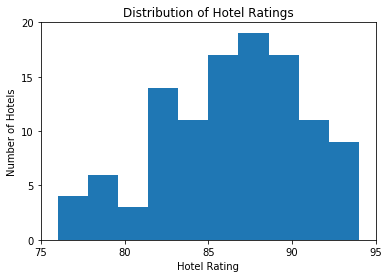

In [16]:
plt.hist(df.Rating,bins=10)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Hotel Rating')
plt.ylabel('Number of Hotels')
plt.xticks([75,80,85,90,95])
plt.yticks([0,5,10,15,20])
plt.show

Text(0.5,1,'Number of Reviews by Hotel Rating')

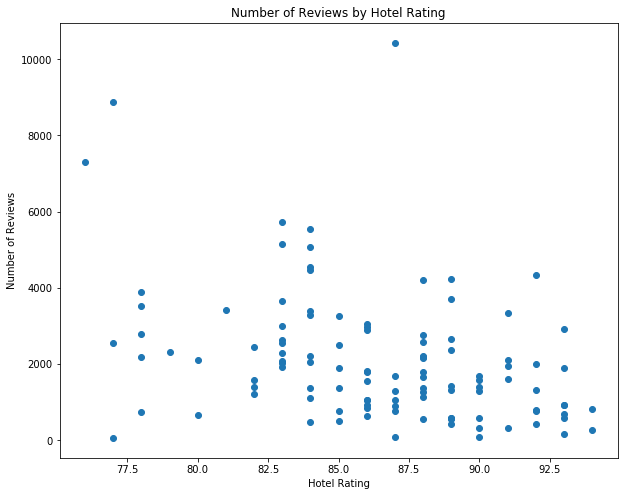

In [153]:
# Examine number of reviews by rating

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(df.Rating, df['Number of Reviews'])
ax.set_xlabel('Hotel Rating')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews by Hotel Rating')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score

# Create two new data frames, one with the feature variables and the other with the target column
dfX=df.drop(columns=['Rating','Number of Reviews']) # Rating is the target, and we're not going to use # of reviews
# since they are neither discretionary nor do they tell us about customer preferences
X=dfX
y=df['Rating']

# Split data into training and holdout/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43) # b/c 42 is overrated

In [9]:
# 3-fold cross-validation with our data
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='mean_squared_error')

print(scores)

[-56.7078362  -50.65953325 -52.6792722 ]


In [10]:
##### from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Scale X-axis data for Ridge and Lasso regressions
ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)

In [11]:
model = Ridge()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,1e1,1e2,1e3], 'fit_intercept': [True]}
grid = GridSearchCV(model, parameters, cv=3, scoring='mean_squared_error', n_jobs=1)
grid.fit(X_train_scaled, y_train)
grid.cv_results_

{'mean_fit_time': array([0.00556993, 0.00093134, 0.00085457, 0.00097489, 0.0011967 ,
        0.00103831, 0.00081801]),
 'std_fit_time': array([6.33847765e-03, 8.34002442e-05, 2.75483243e-05, 1.26526833e-04,
        2.96703170e-05, 6.42194801e-05, 1.12352252e-05]),
 'mean_score_time': array([0.00041898, 0.000302  , 0.00030605, 0.00034372, 0.00046738,
        0.00035874, 0.00029174]),
 'std_score_time': array([9.61750983e-05, 1.50466282e-05, 2.04589754e-05, 5.40778795e-05,
        8.79861111e-05, 7.31582099e-06, 3.12884962e-06]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, True, True, True, True, True],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001, 'fit_intercept': True},
  {'a

In [12]:
model = Lasso()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,1e1,1e2,1e3], 'fit_intercept': [True]}
grid = GridSearchCV(model, parameters, cv=3, scoring='mean_squared_error', n_jobs=1)
grid.fit(X_train_scaled, y_train)
grid.cv_results_

{'mean_fit_time': array([0.00583704, 0.00165963, 0.00074267, 0.00060399, 0.00057745,
        0.00074307, 0.00081197]),
 'std_fit_time': array([3.96132225e-03, 4.06411353e-04, 6.30276398e-05, 1.79309511e-05,
        8.35712953e-06, 1.38212374e-04, 1.05594282e-05]),
 'mean_score_time': array([0.0005486 , 0.0002861 , 0.0002691 , 0.00030287, 0.00025702,
        0.0003407 , 0.00035103]),
 'std_score_time': array([1.51647711e-04, 7.76478716e-06, 4.63266107e-06, 4.37896178e-05,
        7.32789759e-06, 6.73053017e-05, 1.50315094e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, True, True, True, True, True],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001, 'fit_intercept': True},
  {'a

In [159]:
type(grid.best_estimator_)

sklearn.linear_model.coordinate_descent.Lasso

In [160]:
# Check predicted values and residuals on best lasso, and compute sum of squared residuals.
X_test_scaled = ssX.transform(X_test)
best_lasso = grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)
resid_list = []
SSR = 0
for true,pred in zip(y_test, lasso_pred):
    resid = true - pred
    resid_list.append(resid)
    SSR += resid**2
    print("pred, resid:", str(pred) + ", $"+ str(resid))
    
print(grid.best_params_, grid.best_score_)

pred, resid: 86.77009813929656, $-1.7700981392965645
pred, resid: 86.77009813929656, $2.2299018607034355
pred, resid: 85.58809516865138, $2.4119048313486218
pred, resid: 85.58809516865138, $-2.5880951686513782
pred, resid: 86.77009813929656, $5.2299018607034355
pred, resid: 85.58809516865138, $-2.5880951686513782
pred, resid: 85.58809516865138, $7.411904831348622
pred, resid: 86.77009813929656, $0.22990186070343555
pred, resid: 86.77009813929656, $-2.7700981392965645
pred, resid: 85.58809516865138, $-5.588095168651378
pred, resid: 86.77009813929656, $1.2299018607034355
pred, resid: 85.58809516865138, $2.4119048313486218
pred, resid: 85.58809516865138, $-2.5880951686513782
pred, resid: 85.58809516865138, $6.411904831348622
pred, resid: 85.58809516865138, $4.411904831348622
pred, resid: 85.58809516865138, $3.4119048313486218
pred, resid: 85.58809516865138, $-1.5880951686513782
pred, resid: 85.58809516865138, $2.4119048313486218
pred, resid: 86.77009813929656, $1.2299018607034355
pred, re

In [161]:
mean_squared_error=SSR/len(resid_list)
print (mean_squared_error)

15.84707025439869


In [162]:
# With a decent MSE on the holdout (lower than our CV set!), let's try using this lasso model (lambda=1) as our 
# final model.

from sklearn.linear_model import LassoCV
final = LassoCV(alphas=[1],cv=4)
final.fit(X, y)
final.score(X, y)

0.0

In [163]:
# Lambda=1 is giving an R^2 of 0 on the full set. Looks like it may be collapsing the coefficients to baseline.
# So let's go with lambda=0.1 instead.

from sklearn.linear_model import LassoCV
final = LassoCV(alphas=[0.1],cv=4)
final.fit(X, y)
final.score(X, y)

0.127539793635574

In [164]:
# Now we have something to work with. Time to examine the coefficients.
labeled_coef=list(zip(X.columns,final.coef_))

for e in labeled_coef:
    print (e)

('Banquets & Meetings', 0.0)
('Business Center', -0.0)
('Child Programs', -0.0)
('Disabled Access', 0.4625503144988509)
('Executive Retreat', -0.0)
('Fine Dining Nearby', -0.0)
('Fine Dining On Site', 0.0)
('Fitness Center', 0.7602233015751865)
('High Speed Internet', 0.0)
('Meeting Space', -0.0)
('Pets Allowed', 0.6237839406670173)
('Pool Indoor', 0.0)
('Pool Outdoor', -1.181228854210307)
('Spa Facility', 0.15021986607349797)
('Tennis Courts On Site', -0.0)
('Beach', -0.0)
('Biking Touring', -0.12874010618420537)
('Boating', 0.0)
('Dining', 0.0)
('Ecological Tourism', -0.0)
('Golf Driving Range', 0.0)
('Golfing', 0.0)
('Hiking', 0.0)
('Horseback Riding', -0.28365682430377764)
('Ice Skating', 0.0)
('Jogging Running', 1.6772959749304803)
('Shopping', -0.0)
('Tennis Courts Nearby', -0.0)
('Theatre & Museums', -0.0)
('Winery Tours', -0.0)
